# Image Classification pretrained Models Analysis using tensorflow

**Import the libraries**

In [11]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import the tensorflow and its libraries:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten


# Download and Explore the dataset:

The dataset have the 3700 images of flowers. Dataset have five sub-directories and one per-class 

In [12]:
# Download the dataset:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [13]:
# To count the images:
img_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images: {img_count}")

Total images: 3670


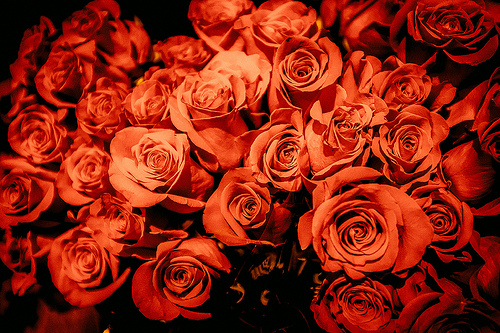

In [16]:
#Print the roses:
import PIL
from PIL import Image
# Choose the dataset of roses:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))


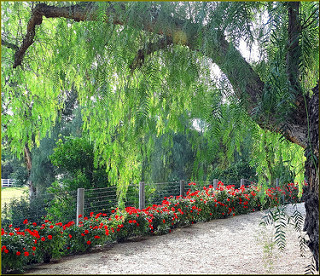

In [17]:
PIL.Image.open(str(roses[5]))

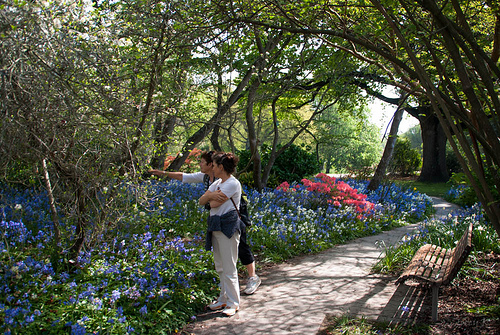

In [18]:
#Print the Tulips:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

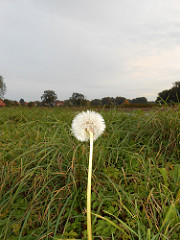

In [20]:
#Print the dandelion:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[2]))

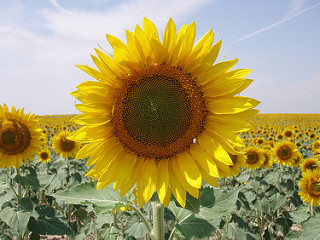

In [23]:
#Print the sunflower:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[1]))

# Load the data using Keras utility

In [24]:
# Load the Dataset paramters:
batch_size = 32
img_height = 180
img_width = 180

#### Split the dataset into train with 80% and validation dataset with 20%

In [25]:
# Define the training dataset:
train_ds =  tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [27]:
# Define the training dataset:
val_ds =  tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:
#Now we define he classes of dataset:
class_name = train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Visualize the Dataset

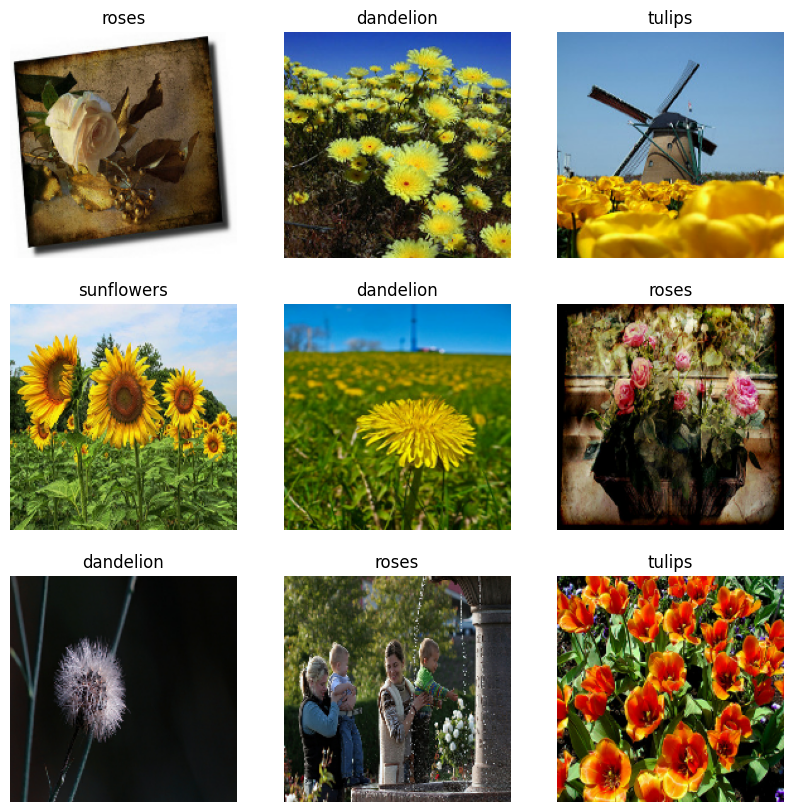

In [29]:
#Now we have to visualize the dataset:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

In [30]:
#Make the Image and Label batch from train dataset:
for img_batch, label_batch in train_ds:
    print(img_batch.shape)
    print(label_batch.shape)
    break

(32, 180, 180, 3)
(32,)


# Configure the dataset performance
- Use the dataset cache
- Dataset prefetch

In [32]:
#AUTOTUNE the dataset:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the Dataset

In [34]:
#Normalize the layers:
normalize_layer = layers.Rescaling(1./255)
#Normalize the train dataset:
normalize_ds = train_ds.map(lambda x, y: (normalize_layer(x), y))
img_batch, label_batch = next(iter(normalize_ds))
first_image = img_batch[0]

#Print the max and min pexel values:
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Create a Basic Keras Model: 

In [35]:
num_classes = len(class_name)

model = Sequential([
    layers.Rescaling(1./255 , input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
#Compile the Model:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
#Summary of Model:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Fit the Model:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Epoch 1/10


c:\Users\Al Hafiz Enterprises\miniconda3\envs\tf_env\lib\site-packages\keras\src\backend\tensorflow\nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.3596 - loss: 1.4707 - val_accuracy: 0.5272 - val_loss: 1.1004
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6122 - loss: 0.9807 - val_accuracy: 0.6185 - val_loss: 0.9358
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 876ms/step - accuracy: 0.6922 - loss: 0.7982 - val_accuracy: 0.6090 - val_loss: 0.9351
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7885 - loss: 0.5859 - val_accuracy: 0.6771 - val_loss: 0.8658
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8600 - loss: 0.3812 - val_accuracy: 0.6635 - val_loss: 1.0230
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 933ms/step - accuracy: 0.9417 - loss: 0.1879 - val_accuracy: 0.6594 - val_loss: 1.2019
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9684 - loss: 0.1105 - val_accuracy: 0.6512 - val_loss: 1.2181
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.9817 - loss: 0.0658 - val_accuracy: 0.5967 - val_loss:

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


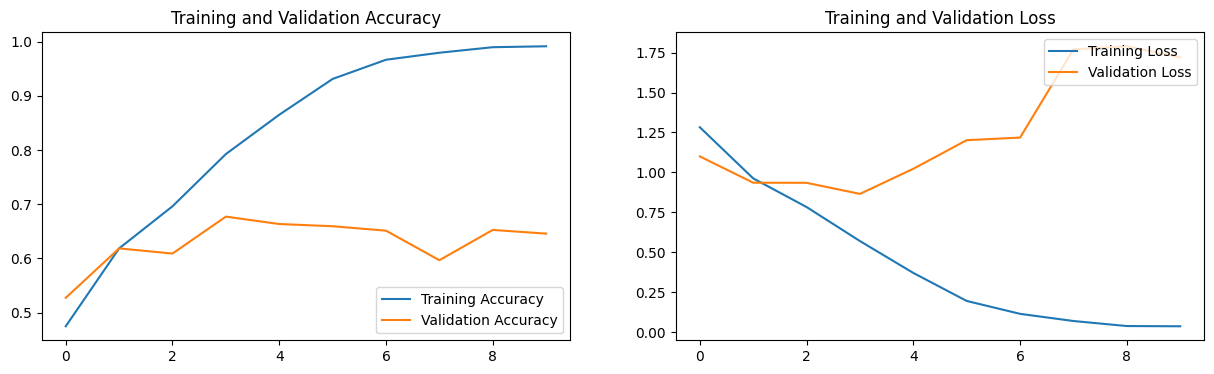

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#Plot the Models:
epochs_range = range(epochs)


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Model is over-fitting 

# Data Augmentation

In [48]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal', input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

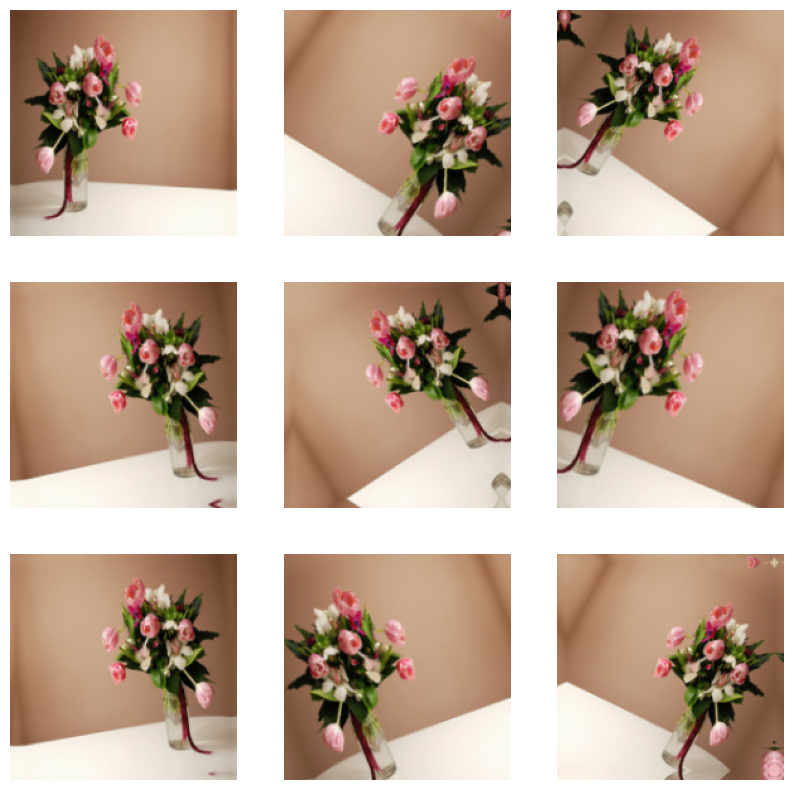

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_img = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img[0].numpy().astype("uint8"))
        plt.axis("off")

# Use the Dropout Layer
- Prepose of Dropout function is regularization of dataset. To prevent the dataset for overfitting

In [50]:
num_classes = len(class_name)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name='outputs')
])

In [53]:
#Compile the Model:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [56]:
#Fit the Model:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.5722 - loss: 1.0432 - val_accuracy: 0.6022 - val_loss: 1.0097
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6598 - loss: 0.9343 - val_accuracy: 0.6308 - val_loss: 0.9501
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.6698 - loss: 0.8537 - val_accuracy: 0.6376 - val_loss: 0.9378
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.6963 - loss: 0.7991 - val_accuracy: 0.6703 - val_loss: 0.8642
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 91s 990ms/step - accuracy: 0.7028 - loss: 0.7652 - val_accuracy: 0.6907 - val_loss: 0.8285
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 87s 940ms/step - accuracy: 0.7107 - loss: 0.7459 - val_accuracy: 0.7044 - val_loss: 0.7809
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 926ms/step - accuracy: 0.7399 - loss: 0.6902 - val_accuracy: 0.7044 - val_loss: 0.7723
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 85s 916ms/step - accuracy: 0.7466 - loss: 0.6720 - val_accuracy: 0.655

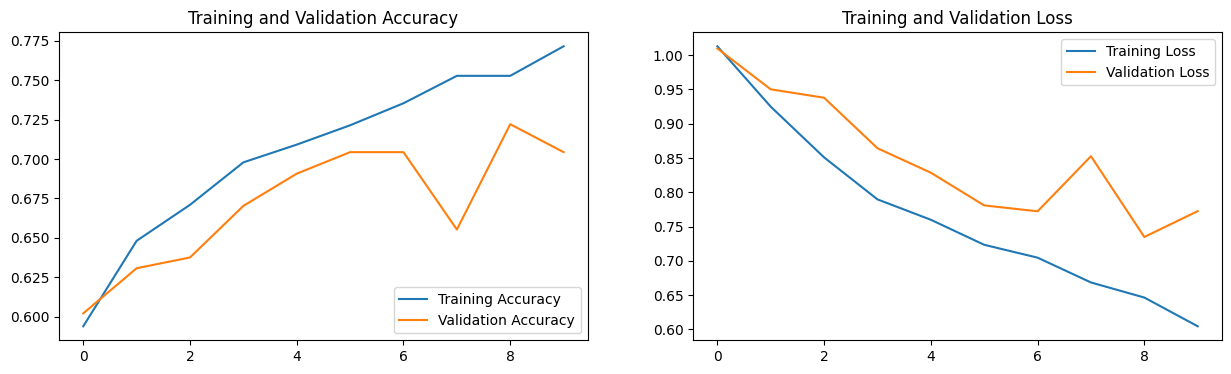

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#Plot the Models:
epochs_range = range(epochs)


plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()